In [44]:
from pandas import read_excel, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [45]:
dataset = read_excel('data.xlsx', "Merge")
dataset.head()

,Дата,Температура,Давление,Влажность,Ветер,День года,День недели,День,Квартал,Месяц,Неделя года,Неделя месяца,Продажи.Итого,Продажи.Требуемый товар,Продажи.Код товара,Продажи.Подразделение
0,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,800,"Масло 82,5% Растительно-Сливочное 180г Белавуш...",15269,VIP
1,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,1100,"Масло 72,5% Растительно-Сливочное ЗМЖ 180г Бе...",15963,VIP
2,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,132,"Масло 72,5% Растительно-Сливочное ЗМЖ 500г Бел...",16961,VIP
3,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,16,Продукт По Технологии Сметаны 15% Главмолоко В...,17026,VIP
4,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,323,"Молоко 2,5% Главмолоко Плёнка 450г 20 шт",17029,VIP


In [71]:
ds = dataset.loc[dataset["Продажи.Подразделение"].isin(["Розница"])]
ds.loc[ds["Продажи.Код товара"].isin([22549])]
ds = ds.loc[ds["Продажи.Код товара"].isin([22549])]

In [72]:
ds.drop(columns={
    "Дата"
    ,"Давление"
    ,"Ветер"
    #,"День"
    #,"Неделя месяца"
    ,"Продажи.Требуемый товар"
    ,"Продажи.Код товара"
    ,"Продажи.Подразделение"
    }, inplace=True)
ds.corr()

,Температура,Влажность,День года,День недели,День,Квартал,Месяц,Неделя года,Неделя месяца,Продажи.Итого
Температура,1.000000,-0.635106,0.181689,0.008353,-0.011879,0.196519,0.185795,0.180806,-0.002435,-0.116831
Влажность,-0.635106,1.000000,-0.045985,-0.013254,-0.009903,-0.056205,-0.046769,-0.044061,-0.015838,0.162989
День года,0.181689,-0.045985,1.000000,-0.008119,0.069783,0.967020,0.996491,0.999774,0.083947,0.197453
День недели,0.008353,-0.013254,-0.008119,1.000000,0.015024,-0.004038,-0.009363,-0.024462,-0.169928,-0.125352
День,-0.011879,-0.009903,0.069783,0.015024,1.000000,-0.013772,-0.013646,0.069840,0.958017,0.011594
Квартал,0.196519,-0.056205,0.967020,-0.004038,-0.013772,1.000000,0.970409,0.966720,-0.002068,0.198804
Месяц,0.185795,-0.046769,0.996491,-0.009363,-0.013646,0.970409,1.000000,0.996277,0.004022,0.196935
Неделя года,0.180806,-0.044061,0.999774,-0.024462,0.069840,0.966720,0.996277,1.000000,0.086867,0.206949
Неделя месяца,-0.002435,-0.015838,0.083947,-0.169928,0.958017,-0.002068,0.004022,0.086867,1.000000,0.026860
Продажи.Итого,-0.116831,0.162989,0.197453,-0.125352,0.011594,0.198804,0.196935,0.206949,0.026860,1.000000


In [73]:
trg = ds[['Продажи.Итого','Продажи.Итого']]
trn = ds.drop(['Продажи.Итого','Продажи.Итого'], axis=1)

In [74]:
models = [LinearRegression() # метод наименьших квадратов
            , RandomForestRegressor(n_estimators=100, max_features ='sqrt') # случайный лес
            , KNeighborsRegressor(n_neighbors=6) # метод ближайших соседей
            , SVR(kernel='linear') # метод опорных векторов с линейным ядром
            #, LogisticRegression() # логистическая регрессия
            ]
models

[LinearRegression(),
 RandomForestRegressor(max_features='sqrt'),
 KNeighborsRegressor(n_neighbors=6),
 SVR(kernel='linear')]

In [75]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)
Xtrn, Xtest, Ytrn, Ytest

(        Температура  Влажность  День года  День недели  День  Квартал  Месяц  \
 64506     15.857143  70.285714        140            3    20        2      5   
 103453    10.000000  79.250000        266            3    23        3      9   
 230842    -4.000000  95.750000         10            3    10        1      1   
 194652     7.000000  84.875000        311            4     6        4     11   
 277096    24.750000  54.250000        170            2    19        2      6   
 ...             ...        ...        ...          ...   ...      ...    ...   
 173175    23.000000  40.625000        239            2    26        3      8   
 20018     -4.000000  93.875000        356            0    21        4     12   
 179474    19.250000  56.625000        260            2    16        3      9   
 249454     3.750000  82.875000         75            5    16        1      3   
 87937     24.428571  70.750000        215            1     3        3      8   
 
         Неделя года  Неде

In [76]:
#создаем временные структуры
TestModels = DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    print(m)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in range(Ytrn.shape[1]):
        #обучаем модель
        model.fit(Xtrn, Ytrn.iloc[:,i]) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest.iloc[:,0], model.predict(Xtest))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)    

LinearRegression()
RandomForestRegressor(max_features='sqrt')
KNeighborsRegressor(n_neighbors=6)
SVR(kernel='linear')


In [77]:
TestModels

,R2_Y1,R2_Y2
Model,,
LinearRegression,0.332111,0.332111
RandomForestRegressor,0.222122,0.205645
KNeighborsRegressor,-0.053408,-0.053408
SVR,0.092371,0.092371


<AxesSubplot:title={'center':'R2_Y2'}, xlabel='Model'>

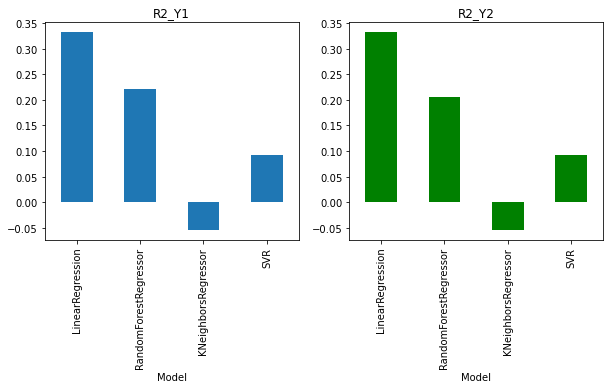

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')


In [81]:
model = models[1]
model.fit(Xtrn, Ytrn)

RandomForestRegressor(max_features='sqrt')

In [82]:
model.feature_importances_

array([0.16504774, 0.17108028, 0.16227242, 0.20859858, 0.09542127,
       0.01642759, 0.04015638, 0.10144834, 0.03954739])